In [2]:
# usamos libreria de Algebra Linear
using LinearAlgebra
using Logging
using Plots

# modulos incluidos
include("module_JaynesCummings.jl")

population_probability (generic function with 1 method)

In [3]:
@debug "Verbose debugging information.  Invisible by default"
@info  "An informational message"
@warn  "Something was odd.  You should pay attention"
@error "A non fatal error occurred"

┌ Info: An informational message
└ @ Main /home/mendez/github_repositories/my_repositories/quantum_optics/parcial/JaynesCummings_model.ipynb:2
┌ Warning: Something was odd.  You should pay attention
└ @ Main /home/mendez/github_repositories/my_repositories/quantum_optics/parcial/JaynesCummings_model.ipynb:3
┌ Error: A non fatal error occurred
└ @ Main /home/mendez/github_repositories/my_repositories/quantum_optics/parcial/JaynesCummings_model.ipynb:4


In [4]:
# Definimos frecuencias caracteristicas 
ω0 = Float64(100.0); println("ω0 = ",ω0);
g = Float64(abs(ω0/100.0)); println("g = ω0/100 = ",g);
m = 10; println("n = ",m);
println("ħ=1")

ω0 = 100.0


g = ω0/100 = 1.0
n = 10
ħ=1


Expresamos $\hat{H}$ en la base $\mathcal{B}=\left\{ \ket{g,n},\ket{e,(n-1)} \right\}$ y $n\not=0\Rightarrow n \in\mathbb{N}$ y mostramos su representación matricial en pantalla

In [5]:
H1=create_2x2_hamiltonian(ω0*m,g*sqrt(m));
H2=create_2x2_hamiltonian(ω0*(m+1),g*sqrt(m+1))
@show H1
@show H2

# calculamos las autoenergías (autovalores) y autoestados (autovectores) del hamiltoniano
H1_eigenvals=eigenvalues_problem(H1)[1];
H1_eigenvectors=eigenvalues_problem(H1)[2];

H2_eigenvals=eigenvalues_problem(H2)[1];
H2_eigenvectors=eigenvalues_problem(H2)[2];

H1 = [1000.0 3.1622776601683795; 3.1622776601683795 1000.0]
H2 = [1100.0 3.3166247903554; 3.3166247903554 1100.0]


Hacemos el siguiente cambio de variable $\ket{g,n}\equiv\ket{\phi_0};\ket{e,(n-1)}\equiv\ket{\phi_1}$ para simplificar notación

In [6]:
# definimos el estado inicial (fundamental), estado auxiliar y estado excitado
ϕ0=[Float64(1),Float64(0)]; # vector columna (nivel fundamental del átomo y n fotones excitados)
ϕ1=[Float64(0),Float64(1)]; # vector columna (nivel excitado del átomo y (n-1) fotones excitados)

# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=1.0;n=Int32(1000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

In [7]:
ψ1_t=evolution(ϕ0,H1_eigenvals,H1_eigenvectors,time_vector); # con estado inicial |ψ0⟩=|g⟩
ψ2_t=evolution(ϕ0,H2_eigenvals,H2_eigenvectors,time_vector); # con estado inicial |ψ0⟩=|g⟩

Calculamos probabilidades de población del estado excitado y fundamental, respectivamente

In [8]:
# probabilidades considerando el 1er sub-bloque del hamiltoniano
pϕ0_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ0,1.0);
pϕ1_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,1.0);

# probabilidades considerando el 2do sub-bloque del hamiltoniano
pϕ0_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ0,1.0);
pϕ1_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,1.0);

pϕ0_tot=0.5*(pϕ0_1.+pϕ0_2);
pϕ1_tot=0.5*(pϕ1_1.+pϕ1_2);

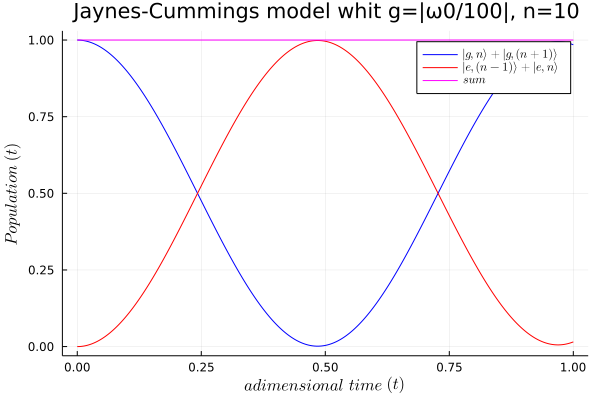

In [9]:
plt = plot()
plot!(plt, time_vector, pϕ0_tot, color = :blue, label = "\$|g,n⟩+|g,(n+1)⟩\$")
plot!(plt, time_vector, pϕ1_tot, color = :red, label = "\$|e,(n-1)⟩+|e,n⟩\$")
plot!(plt, time_vector, (pϕ0_2+pϕ1_2), color = :magenta, label = "\$sum\$")
plot!(ylabel = "\$Population\$ \$(t)\$", xlabel = "\$adimensional\$ \$time\$ \$(t)\$")
plot!(title = "Jaynes-Cummings model whit g=|ω0/100|, n=$(m)")
plot!(plt, legend = :topright)

In [10]:
info_pϕ1=period_oscillator(time_vector,real(pϕ1_tot),1e-5);
println("Ω=",info_pϕ1[1],"\nT=",info_pϕ1[2]);

Ω=Inf
T=0.0


### Resolvemos la evolución para un estado coherente

Partimos de un estado coherente arbitrario dado por $\ket{\chi,\alpha}$ y lo expresamos como combinación lineal de los autoestados del hamiltoniano $ \left\{ \ket{\phi_i} \right\}$ y los estados de Fock $\left\{\ket{n}\right\}$
\begin{align}
    \ket{\chi,\alpha}\equiv \ket{\chi} \otimes \ket{\alpha}
    \Rightarrow \ket{\chi,\alpha}=\left( \sum_{i=1}^{n_i}c_{i}^{\chi}\ket{\phi_i} \right) \otimes
        \left( \sum_{i=1}^{n_j}c_{j}^{\alpha}\ket{n_j}  \right)
\end{align}

Y ahora, recordando que los estados coherentes se descomonen en los estados de Fock de la siguiente manera
\begin{equation}
    \ket{\alpha}=\sum_{n=0}^{\infty}\frac{\alpha^n}{\sqrt{n!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\ket{n}
\end{equation}

Entonces, como los únicos estados de Fock acoplados por los subespacios invariantes son $\left\{\ket{n-1};\ket{n};\ket{n+1}\right\}$ tendremos que los estados $\ket{\alpha}$ se podrán escribir como
\begin{align}
    \ket{\alpha_n}=\frac{\alpha^{(n-1)}}{\sqrt{(n-1)!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\ket{(n-1)}
    +\frac{\alpha^n}{\sqrt{n!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\ket{n}
    +\frac{\alpha^{(n+1)}}{\sqrt{(n+1)!}}\exp\left( \frac{-|\alpha|^2}{2}\right)\ket{(n+1)}\\
    \Rightarrow \ket{\alpha_n}=\frac{\alpha^{(n-1)}}{\sqrt{(n-1)!}}\exp\left( \frac{-|\alpha|^2}{2}\right)
    \left[ \ket{(n-1)} + \frac{\alpha}{\sqrt{n}}\ket{n} + \frac{\alpha²}{\sqrt{n(n+1)}}\ket{n+1}\right]
    ;\ket{\alpha}=\sum_{n=0}^{\infty}\ket{\alpha_n}
\end{align}

Finalmente, particularizando al problema que estamos tratando cada subespacio (sub-bloque diagonal) es de dimensión 2 y dentro de cada uno tendremos las siguientes relaciones,

\begin{align}
    \ket{\chi,\alpha}_n=\left( c_{1}^{\chi}\ket{\phi_1}+c_{2}^{\chi}\ket{\phi_2} \right) \otimes
    \left(  c_1^{\alpha}\ket{(n-1)} + c_2^{\alpha}\ket{n}  \right) \\
    \Rightarrow \ket{\chi,\alpha}_n=c_{1}^{\chi}c_1^{\alpha}\ket{\phi_1,(n-1)}+
    c_{1}^{\chi}c_2^{\alpha}\ket{\phi_1,n}+
    c_{2}^{\chi}c_1^{\alpha}\ket{\phi_2,(n-1)}+
    c_{2}^{\chi}c_2^{\alpha}\ket{\phi_2,n}
\end{align}

Y evolucionando los autoestados de los sub-hamiltonianos (sub-bloques diagonales) trivialmente según la ec. de Schrödinger tendremos

\begin{align}
    \Rightarrow \ket{\chi,\alpha}_n(t)=
    c_{1}^{\chi}c_1^{\alpha}\ket{\phi_1(t),(n-1)}+
    c_{1}^{\chi}c_2^{\alpha}\ket{\phi_1(t),n}+
    c_{2}^{\chi}c_1^{\alpha}\ket{\phi_2(t),(n-1)}+
    c_{2}^{\chi}c_2^{\alpha}\ket{\phi_2(t),n}\\

    \Rightarrow \ket{\chi,\alpha}_n(t)=
    c_{1}^{\chi}\exp\left(\frac{-i\epsilon_1t}{\hbar}\right)
        \left\{
            c_1^{\alpha}\ket{\phi_1,(n-1)}+c_2^{\alpha}\ket{\phi_1,n}
        \right\}+
    c_{2}^{\chi}\exp\left(\frac{-i\epsilon_2t}{\hbar}\right)
        \left\{
            c_1^{\alpha}\ket{\phi_2,(n-1)}+
            c_2^{\alpha}\ket{\phi_2,n}
        \right\}
\end{align}


In [11]:
# Definimos frecuencias caracteristicas 
ω0 = Float64(100.0); println("ω0 = ",ω0);
g = Float64(abs(ω0/100.0)); println("g = ω0/100 = ",g);
println("ħ = 1");

ω0 = 100.0
g = ω0/100 = 1.0
ħ = 1


In [12]:
# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=5.0;n=Int32(1000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

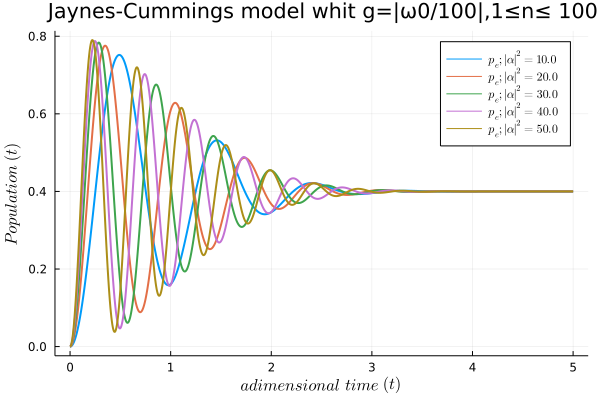

n_tot=100


In [14]:

n_tot=100;   # numero total de estados de Fock considerados
println("n_tot=",n_tot);

# definiciones útiles para plotear
plt1=plot(ylabel="\$Population\$ \$(t)\$",
    xlabel="\$adimensional\$ \$time\$ \$(t)\$",
    title="Jaynes-Cummings model whit g=|ω0/100|,1≤n≤ $(n_tot)",
    legend=:topright)

for αi in 10:10:50  # barremos parámetro del estado coherente

    α=sqrt(αi) # parámetro del estado coherente

    pϕ1_tot=zero(Array{Float64}(undef,length(time_vector)));
    pϕ0_tot=zero(Array{Float64}(undef,length(time_vector)));

    for ni in 2:n_tot       # barremos númeor de fotones excitados

        # Definimos primer, segundo y tercer sub-bloque a diagonalizar (acoplados por el valor particular ni)
        H1=create_2x2_hamiltonian(ω0*(ni-1),g*sqrt(ni-1));
        H2=create_2x2_hamiltonian(ω0*ni,g*sqrt(ni));
        H3=create_2x2_hamiltonian(ω0*(ni+1),g*sqrt(ni+1));

        # calculamos las autoenergías (autovalores) y autoestados (autovectores) del hamiltoniano
        H1_eigenvals=eigenvalues_problem(H1)[1];H1_eigenvectors=eigenvalues_problem(H1)[2];
        H2_eigenvals=eigenvalues_problem(H2)[1];H2_eigenvectors=eigenvalues_problem(H2)[2];
        H3_eigenvals=eigenvalues_problem(H3)[1];H3_eigenvectors=eigenvalues_problem(H3)[2];

        # Definimos parámetros que caracterizan al estado coherente
        αcoeff1=((α^(ni-1))*exp(-0.5*(abs(α)^2)))/sqrt(factorial(BigInt(ni-1)));
        αcoeff2=αcoeff1*(α/sqrt(ni));
        αcoeff3=αcoeff2*(α/sqrt(ni+1));

        α_params=(αcoeff1,αcoeff2,αcoeff2); # Tupla de parámetros

        # Realizamos evolución del los sub-bloques
        ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
        ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
        ψ3_t=evolution_coherent_state(ϕ0,α_params[3],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

        # Calculamos probabilidades de población
        pϕ0_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ0,α_params[1]);
        pϕ1_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);

        pϕ0_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ0,α_params[2]);
        pϕ1_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

        pϕ0_3=population_probability(time_vector,H3_eigenvectors,ψ3_t,ϕ0,α_params[3]);
        pϕ1_3=population_probability(time_vector,H3_eigenvectors,ψ3_t,ϕ1,α_params[3]);

        pϕ1_tot.=(pϕ1_tot.+pϕ1_1.+2.0*pϕ1_2.+pϕ1_3);
        pϕ0_tot.=(pϕ0_tot.+pϕ0_1.+2.0*pϕ0_2.+pϕ0_3);
    end

    # normalizamos las probabilidades
    pϕ1_tot=0.2*pϕ1_tot;
    pϕ0_tot=0.2*pϕ0_tot;
    pϕ_tot=(pϕ1_tot.+pϕ0_tot);

    
    # CÓMO HACER PARA QUE ME MUESTRE TODOS LOS GRÁFICOS PARA DISTINTOS α ????

    plt1=plot!(time_vector,pϕ1_tot,label="\$p_e;|α|^2=$(round(α^2; digits=2))\$",lw=2)
    #plt1=plot!(time_vector,pϕ0_tot,label="\$p_g;α=$(α)\$")
    #plt1=plot!(time_vector,pϕ_tot,label="\$p_{tot};α=$(α)\$")
end

display(plt1)

Notemos que la forma de la población del estado excitado partiendo de un estado coherente corresponde a oscilaciones de Rabi de frecuencia amoritugada. Este fenómeno de amortiguamiento de las oscilaciones de Rabi se conoce como colapso de Cummings.
Ahora nos preguntamos ¿Por qué colapsan las oscilaciones de Rabi cuando el campo inicial está en un estado coherente? Esto es debido a que como la frecuencia de Rabi es una función del número de fotones del modo $\omega _{e} =\frac{g\sqrt{( n+1)}}{\hbar }$ y dado que el estado coherente es una superposición de estados de Fock, pesada según la distribución de Poisson de osiclaciones de Rabi de frecuencias diferentes, dará lugar a una oscilación amortiguada ya que las diferentes oscilaciones de Rabi se desfasan entre sí, cancelándose. El tiempo que estas oscilaciones tardan en desfasarse biene dado por la expresión $t_{colapso} \sim \pi/lg$ con $l \sim 1$ entonces, cuanto mayor es el valor de $g$ menor es el tiempo de colapso y y menor es el periodo de las osiclaciones de Rabi, por lo tanto, el número de oscilaciones que ocurren antes de l colapso es mucho mayor cuanto mayor es el valor de $g$. Además, en este límite el valor de la frecuencia de Rabi es el mismo que predice la teoría semiclásica.
Ahora bien, dado que el número de fotones $n$ es un entero, la superposición de oscilaciones de Rabi de distintas frecuencias no es una superposición continua sino discreta $(\omega _{e}\propto \sqrt{( n+1)})$ y podemos esperar que al cabo de un cierto periodo de tiempo las diferentes oscilaciones puedan volver a ponerse en fase, al menos parcialmente, lo que implicaría una reactivación de las osiclaciones de Rabi (revival), es decir, obtendremos un "batido".

In [15]:
# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=50.0;n=Int32(1000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

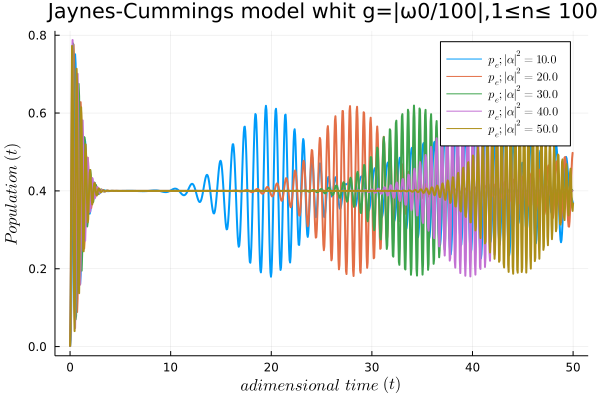

n_tot=100


In [16]:

n_tot=100;   # numero total de estados de Fock considerados
println("n_tot=",n_tot);

# definiciones útiles para plotear
plt1=plot(ylabel="\$Population\$ \$(t)\$",
    xlabel="\$adimensional\$ \$time\$ \$(t)\$",
    title="Jaynes-Cummings model whit g=|ω0/100|,1≤n≤ $(n_tot)",
    legend=:topright)

for αi in 10:10:50  # barremos parámetro del estado coherente

    α=sqrt(αi) # parámetro del estado coherente

    pϕ1_tot=zero(Array{Float64}(undef,length(time_vector)));
    pϕ0_tot=zero(Array{Float64}(undef,length(time_vector)));

    for ni in 2:n_tot       # barremos númeor de fotones excitados

        # Definimos primer, segundo y tercer sub-bloque a diagonalizar (acoplados por el valor particular ni)
        H1=create_2x2_hamiltonian(ω0*(ni-1),g*sqrt(ni-1));
        H2=create_2x2_hamiltonian(ω0*ni,g*sqrt(ni));
        H3=create_2x2_hamiltonian(ω0*(ni+1),g*sqrt(ni+1));

        # calculamos las autoenergías (autovalores) y autoestados (autovectores) del hamiltoniano
        H1_eigenvals=eigenvalues_problem(H1)[1];H1_eigenvectors=eigenvalues_problem(H1)[2];
        H2_eigenvals=eigenvalues_problem(H2)[1];H2_eigenvectors=eigenvalues_problem(H2)[2];
        H3_eigenvals=eigenvalues_problem(H3)[1];H3_eigenvectors=eigenvalues_problem(H3)[2];

        # Definimos parámetros que caracterizan al estado coherente
        αcoeff1=((α^(ni-1))*exp(-0.5*(abs(α)^2)))/sqrt(factorial(BigInt(ni-1)));
        αcoeff2=αcoeff1*(α/sqrt(ni));
        αcoeff3=αcoeff2*(α/sqrt(ni+1));

        α_params=(αcoeff1,αcoeff2,αcoeff2); # Tupla de parámetros

        # Realizamos evolución del los sub-bloques
        ψ1_t=evolution_coherent_state(ϕ0,α_params[1],H1_eigenvals,H1_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
        ψ2_t=evolution_coherent_state(ϕ0,α_params[2],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩
        ψ3_t=evolution_coherent_state(ϕ0,α_params[3],H2_eigenvals,H2_eigenvectors,time_vector) # con estado inicial |ϕ0⟩=|g⟩

        # Calculamos probabilidades de población
        pϕ0_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ0,α_params[1]);
        pϕ1_1=population_probability(time_vector,H1_eigenvectors,ψ1_t,ϕ1,α_params[1]);

        pϕ0_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ0,α_params[2]);
        pϕ1_2=population_probability(time_vector,H2_eigenvectors,ψ2_t,ϕ1,α_params[2]);

        pϕ0_3=population_probability(time_vector,H3_eigenvectors,ψ3_t,ϕ0,α_params[3]);
        pϕ1_3=population_probability(time_vector,H3_eigenvectors,ψ3_t,ϕ1,α_params[3]);

        pϕ1_tot.=(pϕ1_tot.+pϕ1_1.+2.0*pϕ1_2.+pϕ1_3);
        pϕ0_tot.=(pϕ0_tot.+pϕ0_1.+2.0*pϕ0_2.+pϕ0_3);
    end

    # normalizamos las probabilidades
    pϕ1_tot=0.2*pϕ1_tot;
    pϕ0_tot=0.2*pϕ0_tot;
    pϕ_tot=(pϕ1_tot.+pϕ0_tot);

    
    # CÓMO HACER PARA QUE ME MUESTRE TODOS LOS GRÁFICOS PARA DISTINTOS α ????

    plt1=plot!(time_vector,pϕ1_tot,label="\$p_e;|α|^2=$(round(α^2; digits=2))\$",lw=2)
    #plt1=plot!(time_vector,pϕ0_tot,label="\$p_g;α=$(α)\$")
    #plt1=plot!(time_vector,pϕ_tot,label="\$p_{tot};α=$(α)\$")
end

display(plt1)